In [ ]:
# Create DataFrames. Organise and explore data in rows and columns
import pandas as pd

# Handle numerical computing e.g. arrays, perform mathematical calculations and statistical functions
import numpy as np

# Basic visualisation  plots, bar graphs, and histograms
import matplotlib.pyplot as plt

# Built on matplotlib for statistcal ddata visualisation. Makes better looking grpahs with lwss code
import seaborn as sns

# RadomisedSearchCV is tool used for hyperparameter (setting) tuning. Randomly tries combinitations of models parameters using cross validaton
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Basic Linear Regression model which assumes straight linear reationship between input features (x) and target values (Y)
from sklearn.linear_model import LinearRegression

# Model which creates an ensemble of decision trees (learning algo used for making predidictions) and avergaes their results for better accuracy- more resistant to overfitting
from sklearn.ensemble import RandomForestRegressor

# Extreme Gradient Boost model builds trees one at a time, correcting the mistakes of the previous tree
from xgboost import XGBRegressor

# MSE- how far off distance between model perdiction is from actual values, by avging squared differnence
# MAE- how well model predicitions match th acutal data
# R2- how well  model explains the variance in data. 1 = perfect, 0 = terrible
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# rescale data so that they're on the same level (zscore normalisation). standardscaler tool does this
from sklearn.preprocessing import StandardScaler

# Runs statistical analysis and builds statsical models
import statsmodels.api as sm

In [ ]:
# Mount Google drive to access dataset file
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/bodyfat.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

### Inspected dataset structure using .info() and .head() to understand the data types and contens. Then checked for missing vlaues. Used fillna() with the median as a precaution to handle potential noise and to stabilise the dataset

In [ ]:
# Display basic information about the datatset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None


In [ ]:
# Display first few rows of the dataset information
print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [ ]:
# Check for missing data for each column. Fill any missing values with median of of each column
df.fillna(df.median(), inplace =True)
print(df.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


# Explaratory Data Analysis
Dataset Features
1. Density determined from underwater weighing

2. Body fat percentage (Siri's 1956 equation)
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumferemce (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Wrist circumference (cm)



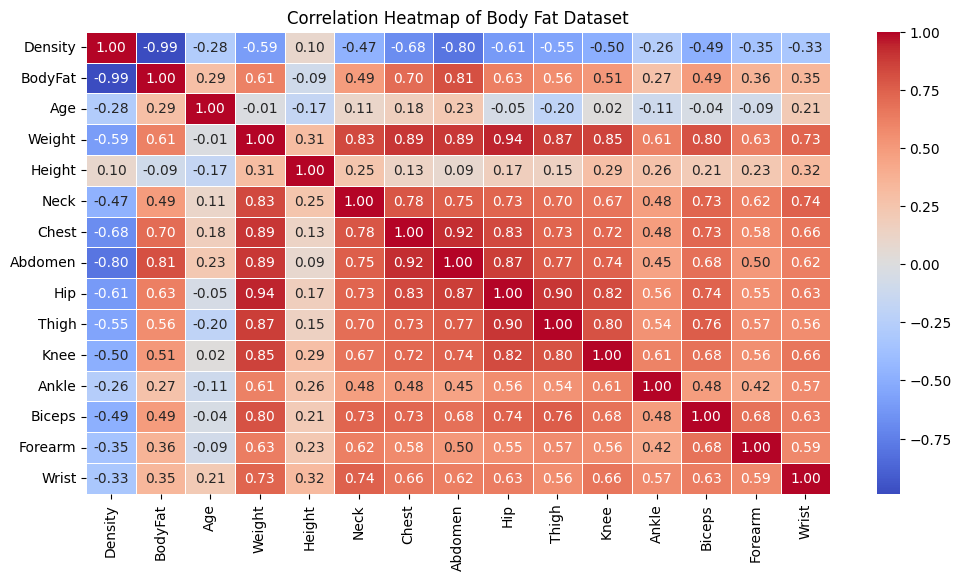

In [ ]:
# Plot correlation matrix to show which features are stronly related
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Body Fat Dataset")
plt.show()

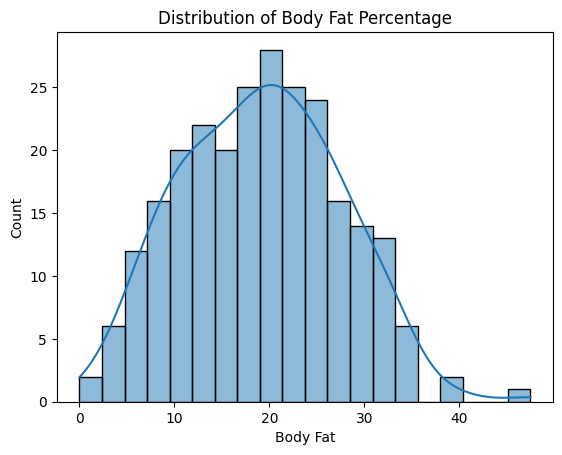

In [ ]:
# Plot showing Distribution of Body Fat Percentagw

# Kernel density estimate draws smooth estimate of the probability density, showing the overall shape of the distribution
sns.histplot(df["BodyFat"], bins=20, kde=True)
plt.title("Distribution of Body Fat Percentage")
plt.xlabel("Body Fat")
plt.ylabel("Count")
plt.show()

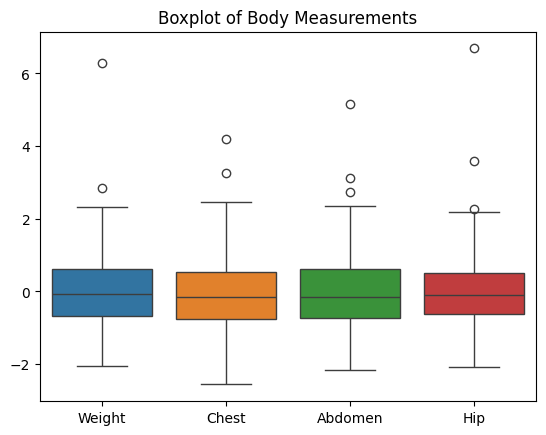

In [ ]:
# Boxplot of selected body measurements

# Line inside box: Median Interquartile range (50%) values
# Whiskers: lines extending from box that aren't outlier. Normal range up to 1.5 x IQR

scaled_columns = ["Weight", "Chest", "Abdomen", "Hip"]
scaler = StandardScaler()

# Replace orginal values with standardised ones
# fut_transform calculates mean and standard deviation of the features before standardisation
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

sns.boxplot(data=df[scaled_columns])
plt.title("Boxplot of Body Measurements")
plt.show()

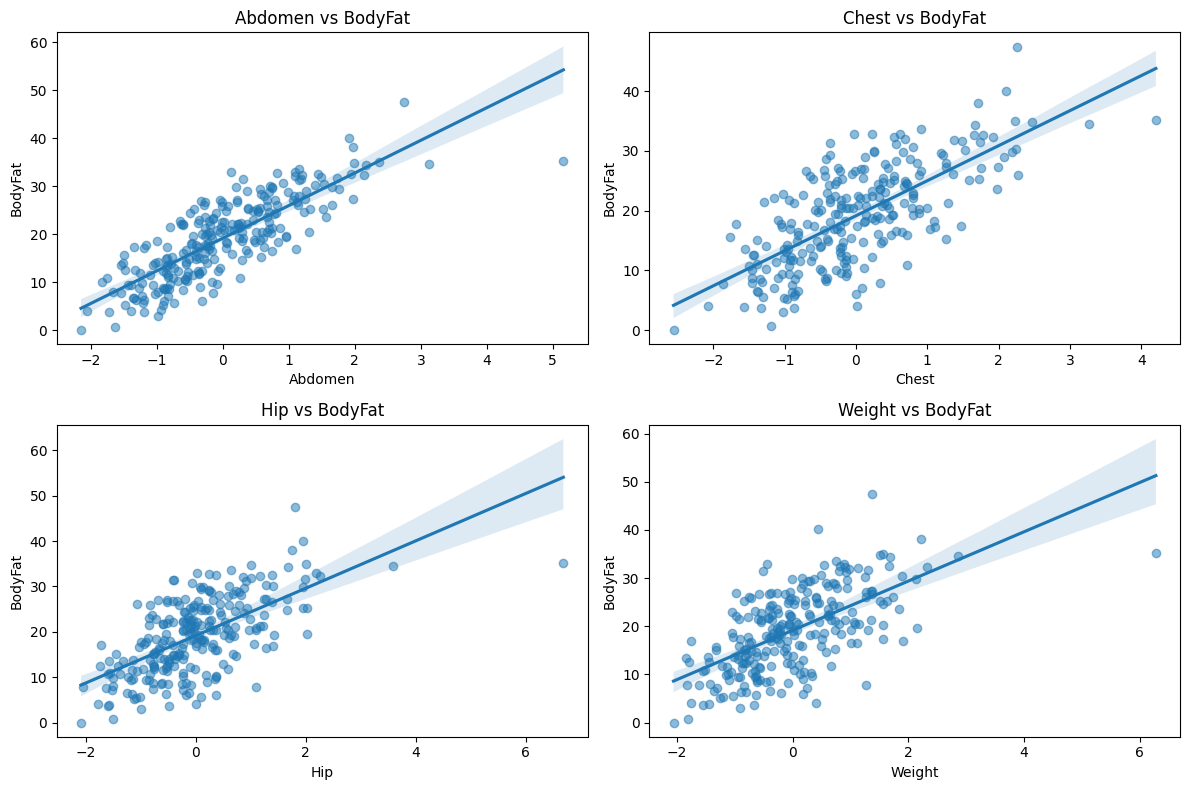

In [ ]:
# Features explored against the target variable
features = ["Abdomen", "Chest", "Hip", "Weight"]

# Figure to hold all subplots-one for each feature
plt.figure(figsize=(12, 8))

# For loop: goes through each feature one by one and keeps track of position of each item
# Enumerate: loops through a list, starting from 1 (default is 0) and keeps count of which item you're on
for i, feature in enumerate(features, 1):

  # Layout with 2x2=4 (row x columns), i indicates the position of the current plot (1 to 4)
    plt.subplot(2, 2, i)

    # Scatterplot with a regression line (best line fit)
    # Scatter_kws: style for the dots, alpha=0.5: semi-transparent)
    sns.regplot(data=df, x=feature, y="BodyFat", scatter_kws={"alpha":0.5})

    plt.title(f"{feature} vs BodyFat")

plt.tight_layout()
plt.show()

# Feature Selection

Feature scaling was applied only for the linear regression model, as it is sensitive to feature magnitudes. For Random Forest and XGBoost, scaling was intentionally omitted, as these tree-based models are not influenced by feature scales and splitting decisions are made based on thresholds rather than distances.

Note: Tested feature selection using three methods as I was getting a high VIF and was unable to use the features
1. Lowering correlation threshold to (0.40+) from 0.60+
2. Using Feature importance (Random Forest)
3. Manually Selecting Featires (Domain Knowledge)
4. Backward Stepwise selection


In [ ]:
# Feature Selection. X= all the features except BodyFat and Density
X = df.drop(columns=["BodyFat", "Density"])

# Sets y to be Body fat as output variable
y = df["BodyFat"]

# Standardise features for regression. Creates a scaler to standardise our values
scaler = StandardScaler()

# scales X and keeps the column names
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
# Repeatably removes least statistically useful features one at a time

# Alpha: significance threshold deciding if feature greater than 5%- remove
def backward_stepwise_selection(X_data, y_data, alpha= 0.05):

  # List of all features
  remaining = list(X_data.columns)

  # Backward Regression until all features are removed
  # keep looping as long as there is features in list
  while len(remaining) > 0:

    # Add columns of 1s to data, which needed to calculate intercept (use only current remaining features)
    X_selected = sm.add_constant(X_data[remaining])

    # Creates OLS. Uses data(y and x) anf finds best line, saving results in the model
    model =sm.OLS(y_data, X_selected).fit()

    # saves all the p-values for your features (not the intercept), which features are statistically useful in regression model
    # p-val: how statistically useful (real) each feature is (from index 1 onwrads).
    p_values = model.pvalues.iloc[1:]

    # Find the biggest p-value - remove
    max_p = p_values.max()

    # Finds feature with large p-val, remove
    if max_p >= alpha:

      # Find the feature with the biggest p-value
      remove_features = p_values.idxmax()

      # Remove that feature
      remaining.remove(remove_features)

    else:

      # Stop if all remaining features are useful
        break

        # Return the list of useful features
  return remaining

# Scales data and puts all features so same
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Run backward setpwise selection function
selected_features = backward_stepwise_selection(X_scaled, y, alpha=0.05)

print("Selected Features:", selected_features)


Selected Features: ['Weight', 'Abdomen', 'Forearm', 'Wrist']


In [ ]:
# Make a new version of X with only the selected features
final_features = df[selected_features]

# Split into 80/20 training and testing set (simple and effective starting point) - avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state=42)

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test features
X_test_scaled = scaler.transform(X_test)

In [ ]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    sns.scatterplot(x= y_pred, y= residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual plot - {model_name}')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

In [ ]:
# Tries to find the best straight line describing relationship between features and body fat %
# Creates linear Regression model
lr_model = LinearRegression()

# Train it on the training data
lr_model.fit(X_train_scaled, y_train)

# Predict body fat for the test set
y_pred_lr = lr_model.predict(X_test_scaled)

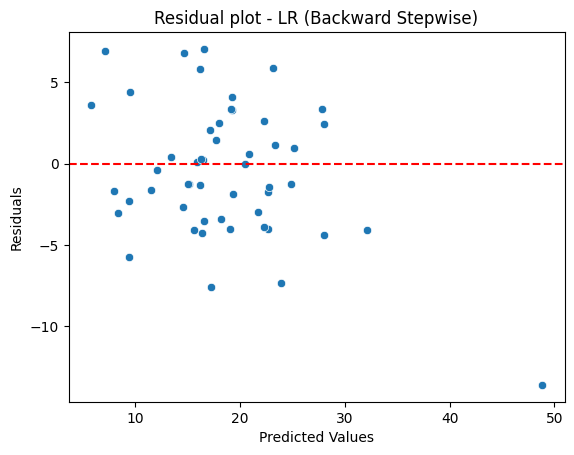

In [ ]:
# Residual plot: x axis predicited, y axis reiduals - randomness in errors = doing okay
plot_residuals(y_test, y_pred_lr, "LR (Backward Stepwise)")

In [ ]:
# Creates basic Random Forest model. random_state=42 ensures results are reproducible
rf_model = RandomForestRegressor(random_state=42)

# Randomised Search
rf_param = {
    # Number of trees in the forest. 50 to 250 gives a reasonable range to test model strengths eithout being slow
    'n_estimators': np.arange(50, 300, 50),
    # Max depth: how may times each tree can split. deeper trees learn nore compicated patterns
    'max_depth': [None, 10, 20, 30],
    # Min number of samples needed to split a node. Default 2,
    'min_samples_split': [2, 5, 10],
    # Min number of data needed at each leaf node before it can split. 1 default, 2 and 4 rep more sample - smoothpredicitions
    'min_samples_leaf': [1, 2, 4]
}

# Randomly trying different hyperparameter combinations (20 )
# hyperparameter options we defined
# minimise the error (lower MSE = better)
# 5-fold cross-validation for more reliable results
# all computer’s cores to make it faster
tune_rf = RandomizedSearchCV(rf_model, rf_param, n_iter=20, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
tune_rf.fit(X_train, y_train)
rf_best = tune_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)


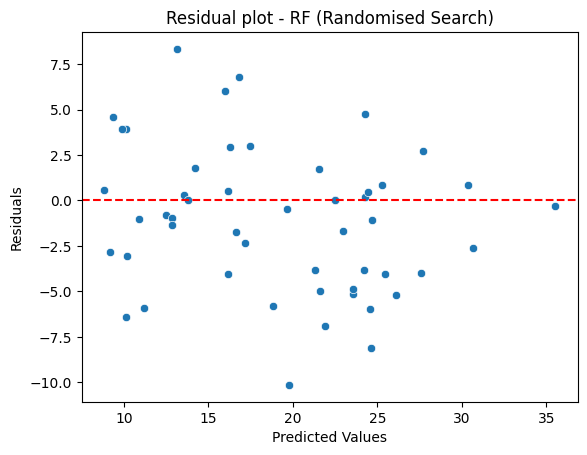

In [ ]:
plot_residuals(y_test, y_pred_rf, "RF (Randomised Search)")

In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_param = {
    # Number of trees in the forest - more trees more stable
    'n_estimators': np.arange(50, 300, 50),
    # how mcu  each tree is allowed to correct previous tree mistake
    # lower/slower to higher/faster learning
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10, 15],
    'subsample': [0.6, 0.8, 1.0]
}

tune_xgb = RandomizedSearchCV(xgb_model, xgb_param, n_iter=20, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
tune_xgb.fit(X_train, y_train)
xgb_best = tune_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)


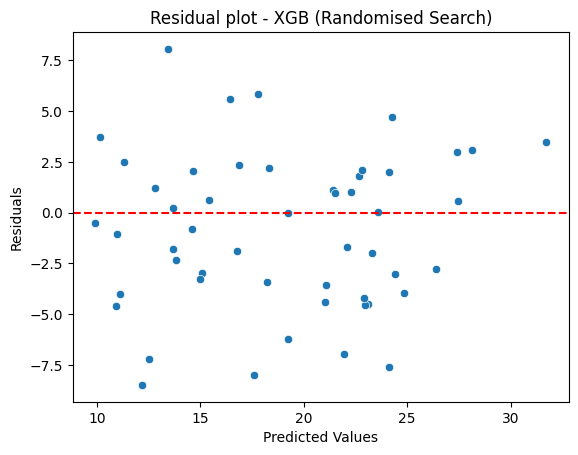

In [ ]:
# Plot residual
# Fairly even scatteres, no obvious trends, curve or funnel shape - not biased and making random errors.
plot_residuals(y_test, y_pred_xgb, "XGB (Randomised Search)")


Evaluating Linear Regression:
Mean Squared Error (MSE): 16.62
Mean Absolute Error (MAE): 3.22
R-squared (R2): 0.64

Evaluating Random Forest:
Mean Squared Error (MSE): 16.55
Mean Absolute Error (MAE): 3.21
R-squared (R2): 0.64

Evaluating XGBoost:
Mean Squared Error (MSE): 15.29
Mean Absolute Error (MAE): 3.21
R-squared (R2): 0.67

Model Performance Comparison:
               Model      RMSE  R² Score       MAE
0  Linear Regression  4.077324  0.642621  3.221669
1      Random Forest  4.068516  0.644164  3.213395
2            XGBoost  3.910776  0.671221  3.213891


<ipython-input-20-abdf04d24b2d>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=model_comparison, palette="viridis")


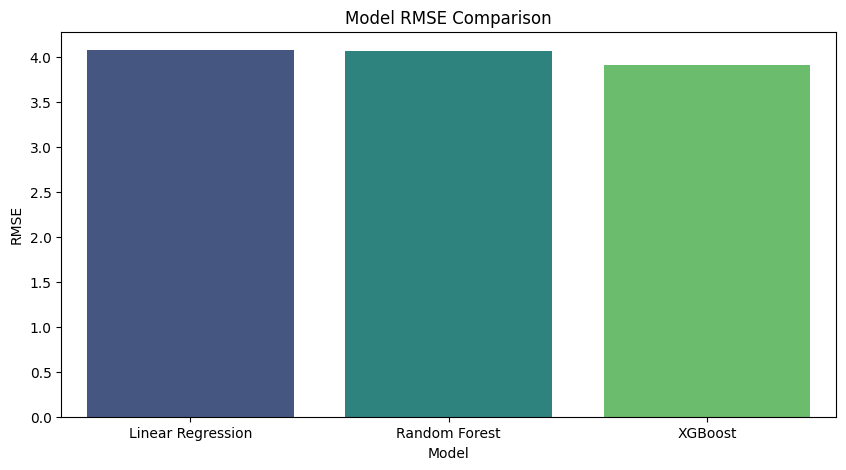

In [ ]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nEvaluating {model_name}:")
    print("Mean Squared Error (MSE):", round(mse, 2))
    print("Mean Absolute Error (MAE):", round(mae, 2))
    print("R-squared (R2):", round(r2, 2))

# Evaluate XGBboost and Random Forest Models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Model Comparison Table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))],
    "R² Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_xgb)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)]
})

# Print model comparison table
print("\nModel Performance Comparison:")
print(model_comparison)

# Visualising model performance with bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="RMSE", data=model_comparison, palette="viridis")
plt.title("Model RMSE Comparison")
plt.show()
